In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
iRT_mcs_f = "../results/Biognosys_iRT.MCS.tsv"
df_iRT_mcs = pd.read_table(iRT_mcs_f, low_memory=False)

In [3]:
df_iRT_mcs[[i for i in df_iRT_mcs.columns if i.startswith('Same')]].map(lambda x: 1 if x else 0).apply(pd.Series.value_counts)

,Same_Sequence,Same_file,Same_spectrum,Same_Sample_source,Same_Method,Same_Mass_spectrometer
0,2478811,2626269,2736630.0,599771,599771,1368059
1,257819,110361,NaN,2136859,2136859,1368571


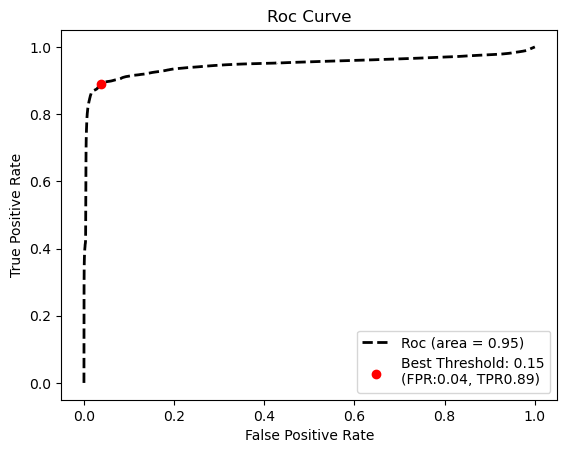

In [4]:
y_label = df_iRT_mcs.Same_Sequence.apply(lambda x: 1 if x else 0)
y_pre = df_iRT_mcs['Modified cosine similarity']
fpr, tpr, thresholds  = roc_curve(y_label, y_pre)
roc_auc = auc(fpr, tpr)
# 计算 Youden's Index
youden_index = tpr - fpr
best_threshold_index = youden_index.argmax()
best_threshold = thresholds[best_threshold_index]

plt.plot(fpr, tpr, 'k--', label='Roc (area = {:.2f})'.format(roc_auc),lw=2)
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index],
            color='red',
            label='Best Threshold: {:.2f}\n(FPR:{:.2f}, TPR{:.2f})'.format(best_threshold,
                                                                           fpr[best_threshold_index],
                                                                           tpr[best_threshold_index]),
            zorder=5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

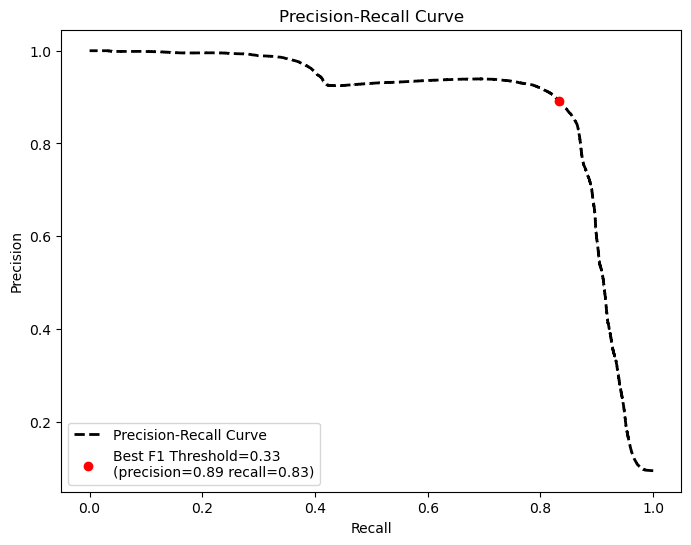

In [5]:
precision, recall, thresholds = precision_recall_curve(y_label, y_pre)
# 计算每个阈值的 F1 分数
f1_scores = 2 * (precision * recall) / (precision + recall)
# 找到 F1 分数最高的阈值
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, 'k--', label='Precision-Recall Curve', lw=2)
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], 
            color='red',
            label="Best F1 Threshold={:.2f}\n(precision={:.2f} recall={:.2f})".format(best_threshold,
                                                                                      precision[best_threshold_index],
                                                                                      recall[best_threshold_index]
                                                                                     ),
            zorder=5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(False)
plt.show()